In [26]:
import pandas as pd
from collections import Counter 
from collections import OrderedDict 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from pandas import DataFrame 
import statistics
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Particulate matter (PM2.5 and PM10) > Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5.Source. The following diagram will help to understand the concept more concretely.

Nitrogen Oxides (NO, NO2, NOx) > Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2)

Sulphur Dioxide(SO2) > Sulfur dioxide, or SO2 is a colorless gas with a strong odor, similar to a just-struck match. It is formed when fuel containing sulfur, such as coal and oil, is burned, creating air pollution.

Carbon Monoxide(CO) > Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.

Benzene, Toluene and Xylene (BTX) > Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry

Ammonia( NH3) > Ammonia pollution is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a byproduct of agriculture and industry.

Ozone(O3) > Ground-level ozone is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. These two primary pollutants are nitrogen oxides (NOx) and volatile organic compounds (VOCs).

In [27]:
path1 = 'city_day.csv'
df1 = pd.read_csv(path1)
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.65,0.49,5.50,42.41,NaN,NaN,NaN,63.0,Satisfactory
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.73,0.44,5.62,44.55,NaN,NaN,NaN,60.0,Satisfactory
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.93,0.51,5.52,38.97,NaN,NaN,NaN,57.0,Satisfactory
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.84,0.46,5.32,39.23,NaN,NaN,NaN,57.0,Satisfactory


In [28]:
#finding avg of each pollotant grouped
dfpm25mean=df1.groupby('City')['PM2.5'].mean()
dfPM10mean=df1.groupby('City')['PM10'].mean()
dfNOmean=df1.groupby('City')['NO'].mean()
dfNO2mean=df1.groupby('City')['NO2'].mean()
dfNOxmean=df1.groupby('City')['NOx'].mean()
dfCOmean=df1.groupby('City')['NH3'].mean()
dfSO2mean=df1.groupby('City')['CO'].mean()
dfO3mean=df1.groupby('City')['SO2'].mean()
dfBenzenemean=df1.groupby('City')['Benzene'].mean()
dfToluenemean=df1.groupby('City')['Toluene'].mean()
dfXylenemean=df1.groupby('City')['Xylene'].mean()
dfAQImean=df1.groupby('City')['AQI'].mean()
dfAQI_Bucketmean=df1.groupby('City')['AQI_Bucket'].apply(lambda x: x.value_counts().index[0]).reset_index()
#dfAQI_Bucketmean.set_index('City', inplace=True)
City_list = dfAQI_Bucketmean['City'].tolist()
AQI_Bucket_list=dfAQI_Bucketmean['AQI_Bucket'].tolist()
#dfpm25mean['City'] = dfpm25mean.index
dfAQI_Bucketmean  

,City,AQI_Bucket
0,Ahmedabad,Severe
1,Aizawl,Satisfactory
2,Amaravati,Satisfactory
3,Amritsar,Moderate
4,Bengaluru,Satisfactory
5,Bhopal,Moderate
6,Brajrajnagar,Moderate
7,Chandigarh,Satisfactory
8,Chennai,Satisfactory
9,Delhi,Poor


In [29]:
dfpm25mean_dict = dfpm25mean.to_dict()
dfPM10mean_dict=dfPM10mean.to_dict()
dfNOmean_dict=dfNOmean.to_dict()
dfNO2mean_dict=dfNO2mean.to_dict()
dfNOxmean_dict=dfNOxmean.to_dict()
dfCOmean_dict=dfCOmean.to_dict()
dfSO2mean_dict=dfSO2mean.to_dict()
dfO3mean_dict=dfO3mean.to_dict()
dfBenzenemean_dict=dfBenzenemean.to_dict()
dfToluenemean_dict=dfBenzenemean.to_dict()
dfXylenemean_dict=dfXylenemean.to_dict()
dfAQImean_dict=dfAQImean.to_dict()
dfAQI_Bucketmean_dict=dict(zip(City_list, AQI_Bucket_list)) 


In [30]:
#handling nan values by replacing it with avg of pollutant grouped by city
df1['PM2.5'] = df1['PM2.5'].fillna(df1.groupby('City')['PM2.5'].transform('mean'))
df1['PM10'] = df1['PM10'].fillna(df1.groupby('City')['PM10'].transform('mean'))
df1['NO'] = df1['NO'].fillna(df1.groupby('City')['NO'].transform('mean'))
df1['NO2'] = df1['NO2'].fillna(df1.groupby('City')['NO2'].transform('mean'))
df1['NOx'] = df1['NOx'].fillna(df1.groupby('City')['NOx'].transform('mean'))
df1['NH3'] = df1['NH3'].fillna(df1.groupby('City')['NH3'].transform('mean'))
df1['CO'] = df1['CO'].fillna(df1.groupby('City')['CO'].transform('mean'))
df1['SO2'] = df1['SO2'].fillna(df1.groupby('City')['SO2'].transform('mean'))
df1['Benzene'] = df1['Benzene'].fillna(df1.groupby('City')['Benzene'].transform('mean'))
df1['Toluene'] = df1['Toluene'].fillna(df1.groupby('City')['Toluene'].transform('mean'))
df1['Xylene'] = df1['Xylene'].fillna(df1.groupby('City')['Xylene'].transform('mean'))
df1['O3'] = df1['O3'].fillna(df1.groupby('City')['O3'].transform('mean'))
df1['AQI'] = df1['AQI'].fillna(df1.groupby('City')['AQI'].transform('mean'))

mode =  df1['AQI_Bucket'].mode()[0]
df1['AQI_Bucket'] = df1.groupby('City')['AQI_Bucket'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False))
df1['AQI_Bucket']= df1['AQI_Bucket'].fillna(df1['AQI_Bucket'].value_counts().idxmax())


In [31]:
df1 = df1.replace(np.nan, 0)#replacing left over nan values with 0
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,69.659932,117.139284,0.92,18.22,17.15,0.00,0.92,27.64,133.36,0.00,0.02,0.00,467.789804,Severe
1,Ahmedabad,2015-01-02,69.659932,117.139284,0.97,15.69,16.46,0.00,0.97,24.55,34.06,3.68,5.50,3.77,467.789804,Severe
2,Ahmedabad,2015-01-03,69.659932,117.139284,17.40,19.30,29.70,0.00,17.40,29.07,30.70,6.80,16.40,2.25,467.789804,Severe
3,Ahmedabad,2015-01-04,69.659932,117.139284,1.70,18.48,17.97,0.00,1.70,18.59,36.08,4.43,10.14,1.00,467.789804,Severe
4,Ahmedabad,2015-01-05,69.659932,117.139284,22.10,21.42,37.76,0.00,22.10,39.33,39.31,7.01,18.89,2.78,467.789804,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Thiruvananthapuram,2020-04-27,14.130000,34.270000,5.60,8.98,12.48,5.65,0.49,5.50,42.41,0.00,0.00,0.00,63.000000,Satisfactory
26215,Thiruvananthapuram,2020-04-28,23.840000,44.320000,6.27,10.01,13.80,5.73,0.44,5.62,44.55,0.00,0.00,0.00,60.000000,Satisfactory
26216,Thiruvananthapuram,2020-04-29,18.540000,34.480000,6.17,9.67,13.35,5.93,0.51,5.52,38.97,0.00,0.00,0.00,57.000000,Satisfactory
26217,Thiruvananthapuram,2020-04-30,20.570000,48.190000,6.28,9.52,13.56,5.84,0.46,5.32,39.23,0.00,0.00,0.00,57.000000,Satisfactory


In [32]:
df1.isnull().sum(axis = 0)#check nan values


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [33]:
df1['Date'] = pd.to_datetime(df1['Date'])#date tranform

In [35]:
df1['BTX'] = df1['Benzene']+df1['Toluene']+df1['Xylene']#adding btx and Particulate_Matter
df1['Particulate_Matter'] = df1['PM2.5']+df1['PM10']
df1['BTX'] = df1['BTX'].fillna(df1.groupby('City')['BTX'].transform('mean'))
df1['Particulate_Matter'] = df1['Particulate_Matter'].fillna(df1.groupby('City')['Particulate_Matter'].transform('mean'))
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,BTX,Particulate_Matter
0,Ahmedabad,2015-01-01,69.659932,117.139284,0.92,18.22,17.15,0.00,0.92,27.64,133.36,0.00,0.02,0.00,467.789804,Severe,0.02,186.799216
1,Ahmedabad,2015-01-02,69.659932,117.139284,0.97,15.69,16.46,0.00,0.97,24.55,34.06,3.68,5.50,3.77,467.789804,Severe,12.95,186.799216
2,Ahmedabad,2015-01-03,69.659932,117.139284,17.40,19.30,29.70,0.00,17.40,29.07,30.70,6.80,16.40,2.25,467.789804,Severe,25.45,186.799216
3,Ahmedabad,2015-01-04,69.659932,117.139284,1.70,18.48,17.97,0.00,1.70,18.59,36.08,4.43,10.14,1.00,467.789804,Severe,15.57,186.799216
4,Ahmedabad,2015-01-05,69.659932,117.139284,22.10,21.42,37.76,0.00,22.10,39.33,39.31,7.01,18.89,2.78,467.789804,Severe,28.68,186.799216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Thiruvananthapuram,2020-04-27,14.130000,34.270000,5.60,8.98,12.48,5.65,0.49,5.50,42.41,0.00,0.00,0.00,63.000000,Satisfactory,0.00,48.400000
26215,Thiruvananthapuram,2020-04-28,23.840000,44.320000,6.27,10.01,13.80,5.73,0.44,5.62,44.55,0.00,0.00,0.00,60.000000,Satisfactory,0.00,68.160000
26216,Thiruvananthapuram,2020-04-29,18.540000,34.480000,6.17,9.67,13.35,5.93,0.51,5.52,38.97,0.00,0.00,0.00,57.000000,Satisfactory,0.00,53.020000
26217,Thiruvananthapuram,2020-04-30,20.570000,48.190000,6.28,9.52,13.56,5.84,0.46,5.32,39.23,0.00,0.00,0.00,57.000000,Satisfactory,0.00,68.760000


In [36]:
#pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

dfn = df1.groupby(    # displaying fault cities capturing polluants by calculating no of zeros in dataset
    ['City']
).agg(lambda x: x.eq(0.00).sum())
print(dfn)


                    Date  PM2.5    PM10   NO  NO2     NOx     NH3      CO  \
City                                                                        
Ahmedabad              0    0.0     0.0  0.0  0.0     7.0  1948.0     0.0   
Aizawl                 0    0.0     0.0  0.0  0.0     0.0     0.0     0.0   
Amaravati              0    0.0     0.0  0.0  0.0     0.0     0.0    17.0   
Amritsar               0    0.0     0.0  0.0  0.0     0.0     0.0   287.0   
Bengaluru              0    0.0     0.0  0.0  0.0   337.0     0.0    10.0   
Bhopal                 0    0.0     0.0  0.0  0.0     0.0     0.0     0.0   
Brajrajnagar           0    0.0     0.0  0.0  0.0    51.0     0.0    64.0   
Chandigarh             0    0.0     0.0  0.0  0.0     0.0     0.0     0.0   
Chennai                0    0.0     0.0  0.0  0.0     0.0     0.0    94.0   
Delhi                  0    0.0     0.0  0.0  0.0     2.0     0.0    87.0   
Ernakulam              0    0.0     0.0  0.0  0.0     0.0     0.0     0.0   

In [37]:
Pollutant_name='Particulate_Matter'# selecting pollutant

df3=df1.groupby(
    [df1.Date.dt.strftime('%Y'), 'City']   #[df1.Date.dt.strftime('%B-%Y'), 'City'] # finding mean of pollutant grouping year and city
)[Pollutant_name].mean()#shows avg pollutant level of eac city and each year
df3

Date  City              
2015  Ahmedabad             194.139295
      Bengaluru             112.557565
      Chennai               120.861267
      Delhi                 347.450258
      Gurugram              317.180294
                               ...    
2020  Mumbai                168.528770
      Patna                 223.045492
      Shillong               91.044622
      Talcher               227.969469
      Thiruvananthapuram     88.428197
Name: Particulate_Matter, Length: 96, dtype: float64

In [38]:
df3=df3.reset_index(level=['Date', 'City'])
df3

,Date,City,Particulate_Matter
0,2015,Ahmedabad,194.139295
1,2015,Bengaluru,112.557565
2,2015,Chennai,120.861267
3,2015,Delhi,347.450258
4,2015,Gurugram,317.180294
...,...,...,...
91,2020,Mumbai,168.528770
92,2020,Patna,223.045492
93,2020,Shillong,91.044622
94,2020,Talcher,227.969469


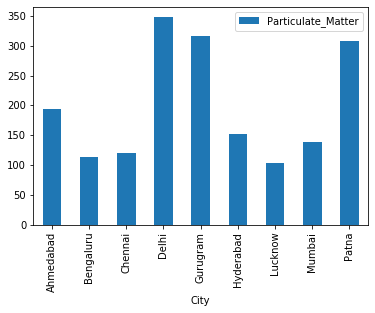

Top 3 Cities in Particulate_Matter Factor ...
   Date      City  Particulate_Matter
3  2015     Delhi          347.450258
4  2015  Gurugram          317.180294
8  2015     Patna          308.691811
------------------------------------------
Least 3 Cities in Particulate_Matter Factor ...
   Date       City  Particulate_Matter
6  2015    Lucknow          102.923156
1  2015  Bengaluru          112.557565
2  2015    Chennai          120.861267
------------------------------------------
Details of All Cities sorted 
   Date       City  Particulate_Matter
3  2015      Delhi          347.450258
4  2015   Gurugram          317.180294
8  2015      Patna          308.691811
0  2015  Ahmedabad          194.139295
5  2015  Hyderabad          152.749654
7  2015     Mumbai          138.405586
2  2015    Chennai          120.861267
1  2015  Bengaluru          112.557565
6  2015    Lucknow          102.923156
 ________________________________________________________
|YEAR :2015 Analysis for Particula

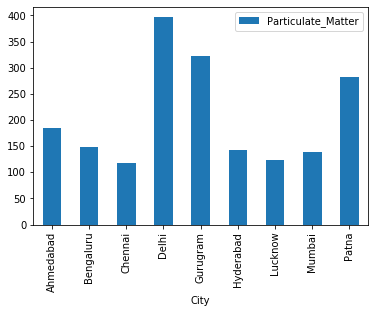

Top 3 Cities in Particulate_Matter Factor ...
    Date      City  Particulate_Matter
12  2016     Delhi          396.220502
13  2016  Gurugram          322.799778
17  2016     Patna          281.795928
------------------------------------------
Least 3 Cities in Particulate_Matter Factor ...
    Date     City  Particulate_Matter
11  2016  Chennai          117.388890
15  2016  Lucknow          123.328455
16  2016   Mumbai          138.405586
------------------------------------------
Details of All Cities sorted 
    Date       City  Particulate_Matter
12  2016      Delhi          396.220502
13  2016   Gurugram          322.799778
17  2016      Patna          281.795928
9   2016  Ahmedabad          184.354293
10  2016  Bengaluru          148.937545
14  2016  Hyderabad          142.880718
16  2016     Mumbai          138.405586
15  2016    Lucknow          123.328455
11  2016    Chennai          117.388890
 ________________________________________________________
|YEAR :2016 Analysis for

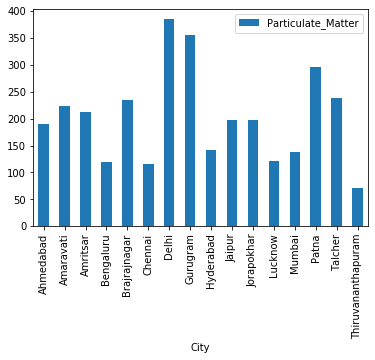

Top 3 Cities in Particulate_Matter Factor ...
    Date      City  Particulate_Matter
24  2017     Delhi          384.752900
25  2017  Gurugram          356.283638
31  2017     Patna          295.580089
------------------------------------------
Least 3 Cities in Particulate_Matter Factor ...
    Date                City  Particulate_Matter
33  2017  Thiruvananthapuram           71.318387
23  2017             Chennai          115.522572
21  2017           Bengaluru          120.286607
------------------------------------------
Details of All Cities sorted 
    Date                City  Particulate_Matter
24  2017               Delhi          384.752900
25  2017            Gurugram          356.283638
31  2017               Patna          295.580089
32  2017             Talcher          237.657409
22  2017        Brajrajnagar          234.999743
19  2017           Amaravati          223.108158
20  2017            Amritsar          213.218788
28  2017          Jorapokhar          198.2319

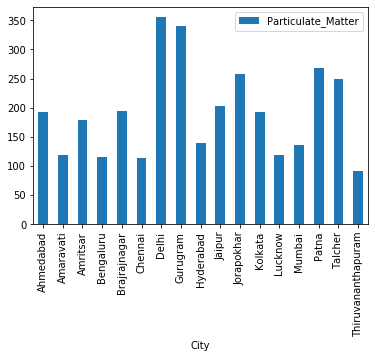

Top 3 Cities in Particulate_Matter Factor ...
    Date      City  Particulate_Matter
40  2018     Delhi          355.129644
41  2018  Gurugram          339.933080
48  2018     Patna          268.607299
------------------------------------------
Least 3 Cities in Particulate_Matter Factor ...
    Date                City  Particulate_Matter
50  2018  Thiruvananthapuram           91.105586
39  2018             Chennai          114.449717
37  2018           Bengaluru          114.717393
------------------------------------------
Details of All Cities sorted 
    Date                City  Particulate_Matter
40  2018               Delhi          355.129644
41  2018            Gurugram          339.933080
48  2018               Patna          268.607299
44  2018          Jorapokhar          258.395476
49  2018             Talcher          249.972096
43  2018              Jaipur          202.461068
38  2018        Brajrajnagar          194.283609
45  2018             Kolkata          192.6188

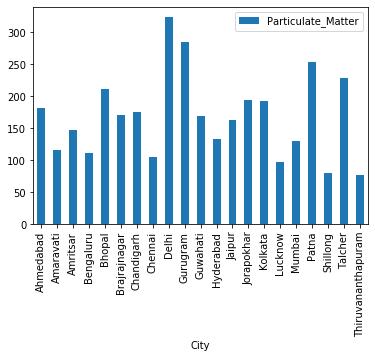

Top 3 Cities in Particulate_Matter Factor ...
    Date      City  Particulate_Matter
59  2019     Delhi          323.549288
60  2019  Gurugram          284.537243
68  2019     Patna          253.395827
------------------------------------------
Least 3 Cities in Particulate_Matter Factor ...
    Date                City  Particulate_Matter
71  2019  Thiruvananthapuram           77.263449
69  2019            Shillong           79.993652
66  2019             Lucknow           98.088658
------------------------------------------
Details of All Cities sorted 
    Date                City  Particulate_Matter
59  2019               Delhi          323.549288
60  2019            Gurugram          284.537243
68  2019               Patna          253.395827
70  2019             Talcher          228.580882
55  2019              Bhopal          210.662736
64  2019          Jorapokhar          194.719070
65  2019             Kolkata          191.869781
51  2019           Ahmedabad          181.2518

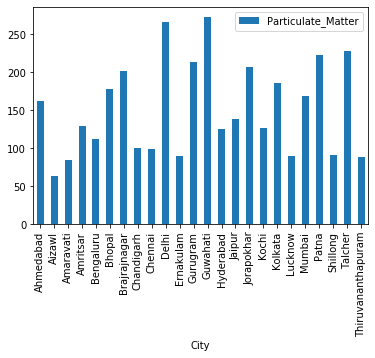

Top 3 Cities in Particulate_Matter Factor ...
    Date      City  Particulate_Matter
84  2020  Guwahati          272.340830
81  2020     Delhi          265.731148
94  2020   Talcher          227.969469
------------------------------------------
Least 3 Cities in Particulate_Matter Factor ...
    Date                City  Particulate_Matter
73  2020              Aizawl           64.060196
74  2020           Amaravati           84.266557
95  2020  Thiruvananthapuram           88.428197
------------------------------------------
Details of All Cities sorted 
    Date                City  Particulate_Matter
84  2020            Guwahati          272.340830
81  2020               Delhi          265.731148
94  2020             Talcher          227.969469
92  2020               Patna          223.045492
83  2020            Gurugram          212.922049
87  2020          Jorapokhar          207.409689
78  2020        Brajrajnagar          201.393784
89  2020             Kolkata          186.4159

In [39]:
#for 2020 analysis before and after lockdown grouped by Year from 2015 to 2020 for selected pollutand for each city 
for datte, df_region in df3.groupby('Date'):
    #df_region=df_region.reset_index(level=['Date', 'City'])
    df_region.plot(x ='City', y=Pollutant_name, kind = 'bar')
    plt.show()
    print('Top 3 Cities in '+ Pollutant_name +' Factor ...' )
    print(df_region.nlargest(3, [Pollutant_name]))
    print('------------------------------------------')
    print('Least 3 Cities in '+ Pollutant_name +' Factor ...' )
    print(df_region.nsmallest(3, [Pollutant_name])) 
    print('------------------------------------------')
    print('Details of All Cities sorted ')
    print(df_region.sort_values(by=[Pollutant_name], ascending=False))
    print(' ________________________________________________________')
    print('|YEAR :'+datte+' Analysis for ' +Pollutant_name+' Factor       |')
    print('|________________________________________________________|')
    


    Date       City  Particulate_Matter
0   2015  Ahmedabad          194.139295
9   2016  Ahmedabad          184.354293
18  2017  Ahmedabad          190.618517
34  2018  Ahmedabad          191.800516
51  2019  Ahmedabad          181.251810
72  2020  Ahmedabad          162.381148


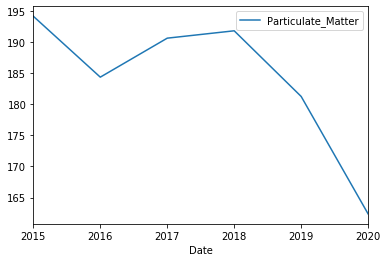

>-----------CITY :Ahmedabad------ANALYSIS ON :Particulate_Matter
    Date    City  Particulate_Matter
73  2020  Aizawl           64.060196
Does not have adequate data to plot graph for City: Aizawl on Particulate_Matter
>-----------CITY :Aizawl------ANALYSIS ON :Particulate_Matter
    Date       City  Particulate_Matter
19  2017  Amaravati          223.108158
35  2018  Amaravati          119.631130
52  2019  Amaravati          116.712071
74  2020  Amaravati           84.266557


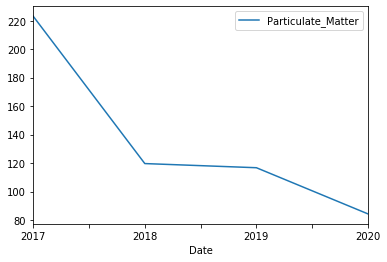

>-----------CITY :Amaravati------ANALYSIS ON :Particulate_Matter
    Date      City  Particulate_Matter
20  2017  Amritsar          213.218788
36  2018  Amritsar          178.707644
53  2019  Amritsar          148.075726
75  2020  Amritsar          129.908780


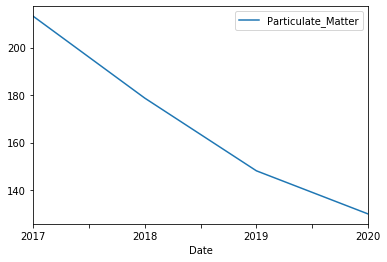

>-----------CITY :Amritsar------ANALYSIS ON :Particulate_Matter
    Date       City  Particulate_Matter
1   2015  Bengaluru          112.557565
10  2016  Bengaluru          148.937545
21  2017  Bengaluru          120.286607
37  2018  Bengaluru          114.717393
54  2019  Bengaluru          111.039425
76  2020  Bengaluru          111.635574


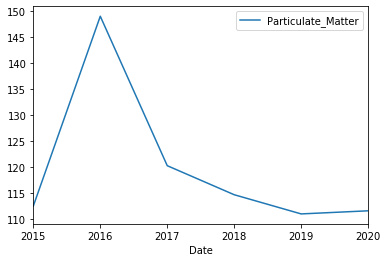

>-----------CITY :Bengaluru------ANALYSIS ON :Particulate_Matter
    Date    City  Particulate_Matter
55  2019  Bhopal          210.662736
77  2020  Bhopal          177.826323


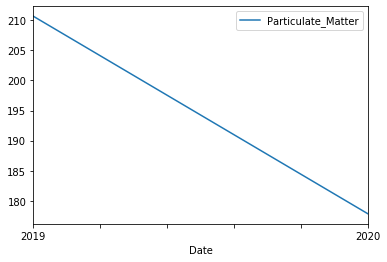

>-----------CITY :Bhopal------ANALYSIS ON :Particulate_Matter
    Date          City  Particulate_Matter
22  2017  Brajrajnagar          234.999743
38  2018  Brajrajnagar          194.283609
56  2019  Brajrajnagar          170.265397
78  2020  Brajrajnagar          201.393784


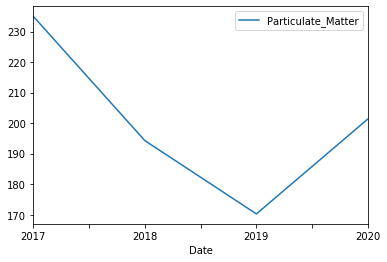

>-----------CITY :Brajrajnagar------ANALYSIS ON :Particulate_Matter
    Date        City  Particulate_Matter
57  2019  Chandigarh          175.564730
79  2020  Chandigarh          100.020574


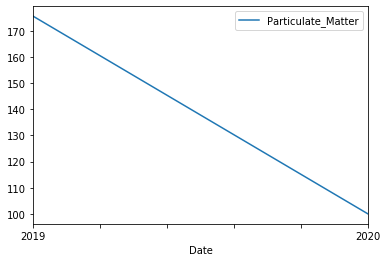

>-----------CITY :Chandigarh------ANALYSIS ON :Particulate_Matter
    Date     City  Particulate_Matter
2   2015  Chennai          120.861267
11  2016  Chennai          117.388890
23  2017  Chennai          115.522572
39  2018  Chennai          114.449717
58  2019  Chennai          104.488761
80  2020  Chennai           99.542709


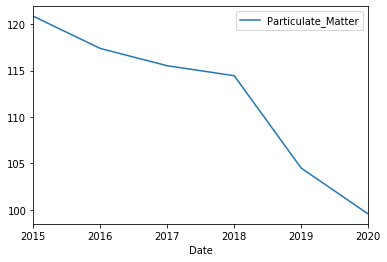

>-----------CITY :Chennai------ANALYSIS ON :Particulate_Matter
    Date   City  Particulate_Matter
3   2015  Delhi          347.450258
12  2016  Delhi          396.220502
24  2017  Delhi          384.752900
40  2018  Delhi          355.129644
59  2019  Delhi          323.549288
81  2020  Delhi          265.731148


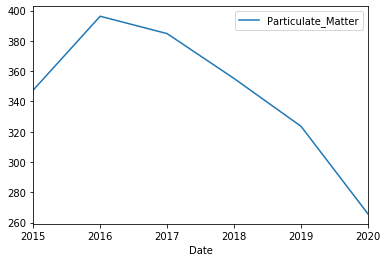

>-----------CITY :Delhi------ANALYSIS ON :Particulate_Matter
    Date       City  Particulate_Matter
82  2020  Ernakulam           90.151111
Does not have adequate data to plot graph for City: Ernakulam on Particulate_Matter
>-----------CITY :Ernakulam------ANALYSIS ON :Particulate_Matter
    Date      City  Particulate_Matter
4   2015  Gurugram          317.180294
13  2016  Gurugram          322.799778
25  2017  Gurugram          356.283638
41  2018  Gurugram          339.933080
60  2019  Gurugram          284.537243
83  2020  Gurugram          212.922049


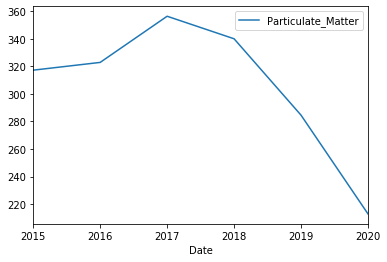

>-----------CITY :Gurugram------ANALYSIS ON :Particulate_Matter
    Date      City  Particulate_Matter
61  2019  Guwahati          168.489592
84  2020  Guwahati          272.340830


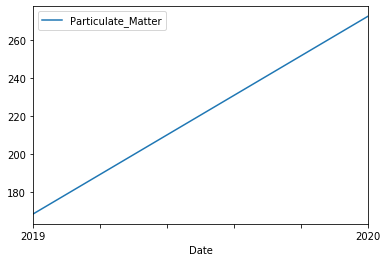

>-----------CITY :Guwahati------ANALYSIS ON :Particulate_Matter
    Date       City  Particulate_Matter
5   2015  Hyderabad          152.749654
14  2016  Hyderabad          142.880718
26  2017  Hyderabad          141.989071
42  2018  Hyderabad          138.752411
62  2019  Hyderabad          132.855836
85  2020  Hyderabad          125.708033


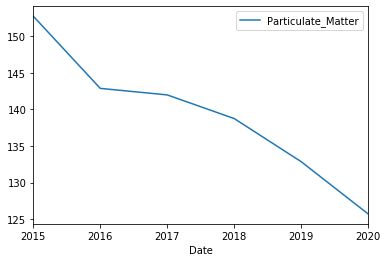

>-----------CITY :Hyderabad------ANALYSIS ON :Particulate_Matter
    Date    City  Particulate_Matter
27  2017  Jaipur          197.339953
43  2018  Jaipur          202.461068
63  2019  Jaipur          163.108548
86  2020  Jaipur          137.842295


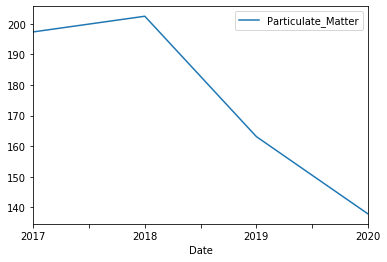

>-----------CITY :Jaipur------ANALYSIS ON :Particulate_Matter
    Date        City  Particulate_Matter
28  2017  Jorapokhar          198.231919
44  2018  Jorapokhar          258.395476
64  2019  Jorapokhar          194.719070
87  2020  Jorapokhar          207.409689


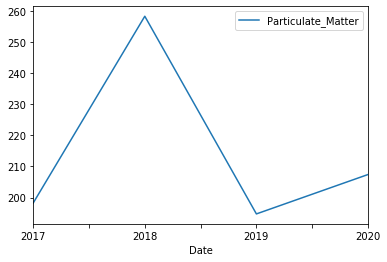

>-----------CITY :Jorapokhar------ANALYSIS ON :Particulate_Matter
    Date   City  Particulate_Matter
88  2020  Kochi          127.296832
Does not have adequate data to plot graph for City: Kochi on Particulate_Matter
>-----------CITY :Kochi------ANALYSIS ON :Particulate_Matter
    Date     City  Particulate_Matter
45  2018  Kolkata          192.618804
65  2019  Kolkata          191.869781
89  2020  Kolkata          186.415984


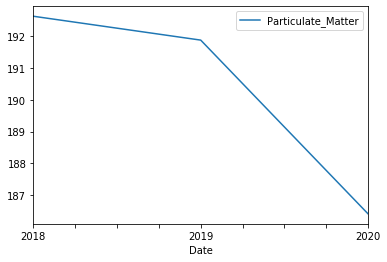

>-----------CITY :Kolkata------ANALYSIS ON :Particulate_Matter
    Date     City  Particulate_Matter
6   2015  Lucknow          102.923156
15  2016  Lucknow          123.328455
29  2017  Lucknow          121.951355
46  2018  Lucknow          119.245534
66  2019  Lucknow           98.088658
90  2020  Lucknow           89.391148


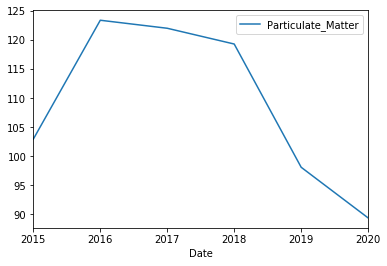

>-----------CITY :Lucknow------ANALYSIS ON :Particulate_Matter
    Date    City  Particulate_Matter
7   2015  Mumbai          138.405586
16  2016  Mumbai          138.405586
30  2017  Mumbai          138.405586
47  2018  Mumbai          136.080463
67  2019  Mumbai          130.662137
91  2020  Mumbai          168.528770


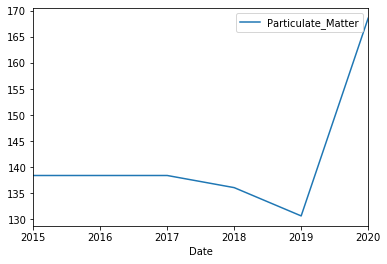

>-----------CITY :Mumbai------ANALYSIS ON :Particulate_Matter
    Date   City  Particulate_Matter
8   2015  Patna          308.691811
17  2016  Patna          281.795928
31  2017  Patna          295.580089
48  2018  Patna          268.607299
68  2019  Patna          253.395827
92  2020  Patna          223.045492


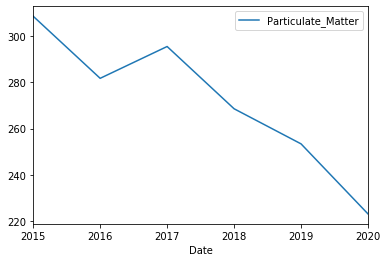

>-----------CITY :Patna------ANALYSIS ON :Particulate_Matter
    Date      City  Particulate_Matter
69  2019  Shillong           79.993652
93  2020  Shillong           91.044622


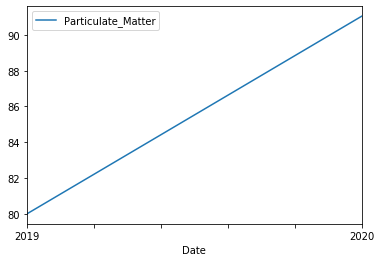

>-----------CITY :Shillong------ANALYSIS ON :Particulate_Matter
    Date     City  Particulate_Matter
32  2017  Talcher          237.657409
49  2018  Talcher          249.972096
70  2019  Talcher          228.580882
94  2020  Talcher          227.969469


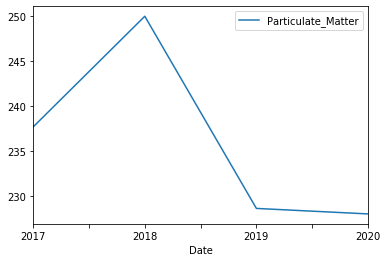

>-----------CITY :Talcher------ANALYSIS ON :Particulate_Matter
    Date                City  Particulate_Matter
33  2017  Thiruvananthapuram           71.318387
50  2018  Thiruvananthapuram           91.105586
71  2019  Thiruvananthapuram           77.263449
95  2020  Thiruvananthapuram           88.428197


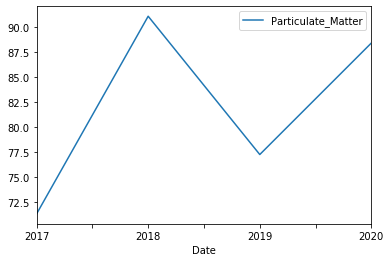

>-----------CITY :Thiruvananthapuram------ANALYSIS ON :Particulate_Matter


In [40]:
#for 2020 analysis before and after lockdown grouped by City 
#fault part implemented here
for citynm, df_region4 in df3.groupby('City'):
    
    print(df_region4)
    df_region4 = df_region4.drop('City', 1)
    if(len(df_region4)>1):
        df_region4.plot(x ='Date', y=Pollutant_name, kind = 'line')
        plt.show()
        if df_region4[Pollutant_name].mean()==0:
            print('Anomalie detected or Fault Detected in recording '+Pollutant_name+' in ' +citynm)
    else:
         print('Does not have adequate data to plot graph for City: ' +citynm+' on '+Pollutant_name )
    print(">-----------CITY :"+citynm+"------ANALYSIS ON :"+Pollutant_name)
#     df_region.plot(x ='Date', y=Pollutant_name, kind = 'line')
#     plt.show()

In [14]:
#extracting lockdown period
Pollutant_name1='BTX'

df31=df1.groupby(
    [df1.Date.dt.strftime('%m/%Y'), 'City']   #[df1.Date.dt.strftime('%B-%Y'), 'City']
)[Pollutant_name1].mean()
df31=df31.reset_index(level=['Date', 'City'])
df31['Date'] =  pd.to_datetime(df31['Date'], format='%m/%Y') 
start_date = '2020-01-01'
end_date =   '2020-05-01'
mask = (df31['Date'] >= start_date) & (df31['Date'] <= end_date)
df31=df31.loc[mask]
df31

,Date,City,AQI
58,2020-01-01,Ahmedabad,316.521265
59,2020-01-01,Amaravati,88.032258
60,2020-01-01,Amritsar,104.806452
61,2020-01-01,Bengaluru,95.322581
62,2020-01-01,Bhopal,160.516129
...,...,...,...
415,2020-05-01,Mumbai,64.000000
416,2020-05-01,Patna,118.000000
417,2020-05-01,Shillong,62.641379
418,2020-05-01,Talcher,101.000000


          Date       City         AQI
58  2020-01-01  Ahmedabad  316.521265
141 2020-02-01  Ahmedabad  547.689655
224 2020-03-01  Ahmedabad  283.606123
310 2020-04-01  Ahmedabad  120.733333
396 2020-05-01  Ahmedabad  134.000000


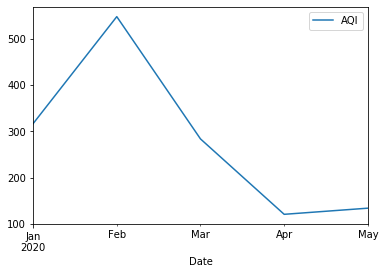

>-----------CITY :Ahmedabad------ANALYSIS ON :AQI
          Date    City        AQI
225 2020-03-01  Aizawl  64.576097
311 2020-04-01  Aizawl  39.233333
397 2020-05-01  Aizawl  20.000000


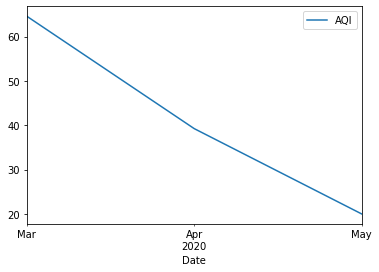

>-----------CITY :Aizawl------ANALYSIS ON :AQI
          Date       City        AQI
59  2020-01-01  Amaravati  88.032258
142 2020-02-01  Amaravati  67.103448
226 2020-03-01  Amaravati  52.548387
312 2020-04-01  Amaravati  44.400000
398 2020-05-01  Amaravati  54.000000


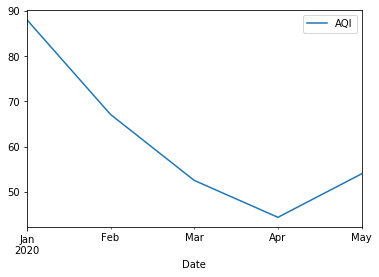

>-----------CITY :Amaravati------ANALYSIS ON :AQI
          Date      City         AQI
60  2020-01-01  Amritsar  104.806452
143 2020-02-01  Amritsar  128.255011
227 2020-03-01  Amritsar   84.957989
313 2020-04-01  Amritsar   71.306197
399 2020-05-01  Amritsar  109.000000


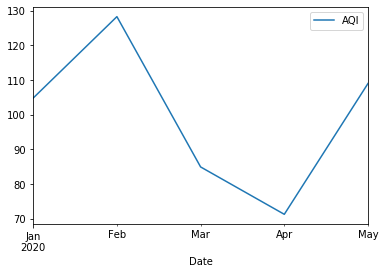

>-----------CITY :Amritsar------ANALYSIS ON :AQI
          Date       City        AQI
61  2020-01-01  Bengaluru  95.322581
144 2020-02-01  Bengaluru  96.482759
228 2020-03-01  Bengaluru  90.741935
314 2020-04-01  Bengaluru  68.533333
400 2020-05-01  Bengaluru  75.000000


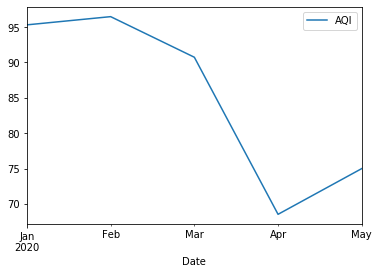

>-----------CITY :Bengaluru------ANALYSIS ON :AQI
          Date    City         AQI
62  2020-01-01  Bhopal  160.516129
145 2020-02-01  Bhopal  128.620690
229 2020-03-01  Bhopal  113.184778
315 2020-04-01  Bhopal  121.201075
401 2020-05-01  Bhopal  121.000000


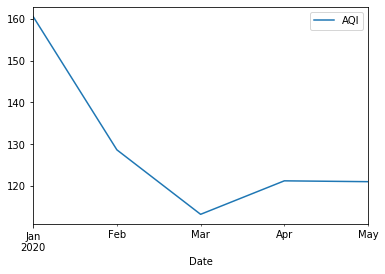

>-----------CITY :Bhopal------ANALYSIS ON :AQI
          Date          City         AQI
63  2020-01-01  Brajrajnagar  154.930270
146 2020-02-01  Brajrajnagar  137.376524
230 2020-03-01  Brajrajnagar  133.630824
316 2020-04-01  Brajrajnagar  139.661279
402 2020-05-01  Brajrajnagar  106.000000


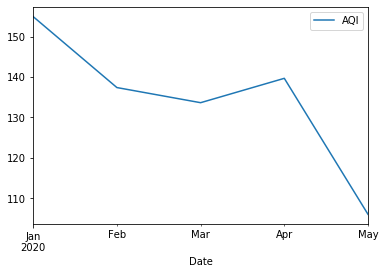

>-----------CITY :Brajrajnagar------ANALYSIS ON :AQI
          Date        City        AQI
64  2020-01-01  Chandigarh  94.064516
147 2020-02-01  Chandigarh  93.379310
231 2020-03-01  Chandigarh  55.419355
317 2020-04-01  Chandigarh  46.538796
403 2020-05-01  Chandigarh  59.000000


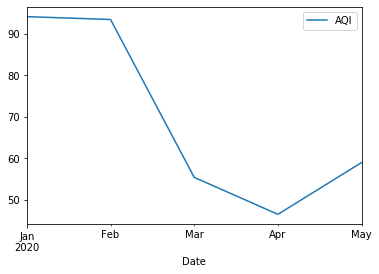

>-----------CITY :Chandigarh------ANALYSIS ON :AQI
          Date     City        AQI
65  2020-01-01  Chennai  87.516129
148 2020-02-01  Chennai  78.137931
232 2020-03-01  Chennai  70.290323
318 2020-04-01  Chennai  63.500000
404 2020-05-01  Chennai  65.000000


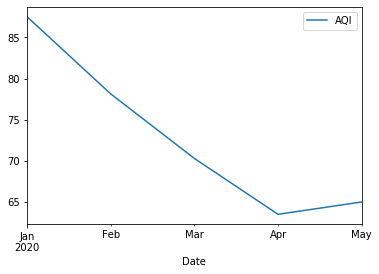

>-----------CITY :Chennai------ANALYSIS ON :AQI
          Date   City         AQI
66  2020-01-01  Delhi  308.451613
149 2020-02-01  Delhi  262.137931
233 2020-03-01  Delhi  135.838710
319 2020-04-01  Delhi  113.000000
405 2020-05-01  Delhi  144.000000


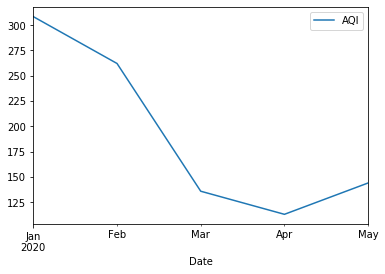

>-----------CITY :Delhi------ANALYSIS ON :AQI
          Date       City         AQI
67  2020-01-01  Ernakulam  121.988421
150 2020-02-01  Ernakulam   96.172414
234 2020-03-01  Ernakulam   84.351104
320 2020-04-01  Ernakulam   70.100000
406 2020-05-01  Ernakulam   90.000000


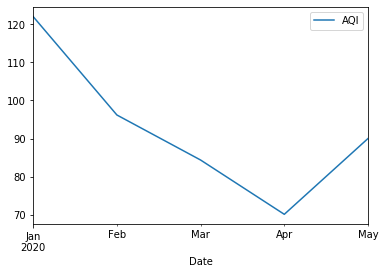

>-----------CITY :Ernakulam------ANALYSIS ON :AQI
          Date      City         AQI
68  2020-01-01  Gurugram  242.225806
151 2020-02-01  Gurugram  197.137931
235 2020-03-01  Gurugram  122.032258
321 2020-04-01  Gurugram  111.166667
407 2020-05-01  Gurugram  164.000000


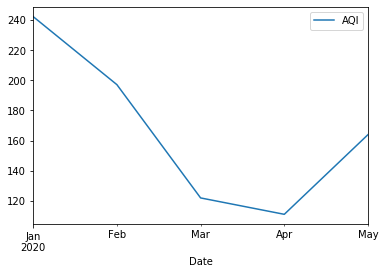

>-----------CITY :Gurugram------ANALYSIS ON :AQI
          Date      City         AQI
69  2020-01-01  Guwahati  291.645161
152 2020-02-01  Guwahati  266.620690
236 2020-03-01  Guwahati  193.806452
322 2020-04-01  Guwahati  127.833333
408 2020-05-01  Guwahati   46.000000


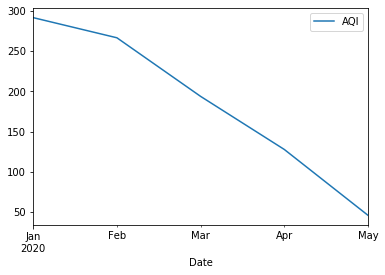

>-----------CITY :Guwahati------ANALYSIS ON :AQI
          Date       City         AQI
70  2020-01-01  Hyderabad  104.548387
153 2020-02-01  Hyderabad   94.965517
237 2020-03-01  Hyderabad   78.741935
323 2020-04-01  Hyderabad   65.000000
409 2020-05-01  Hyderabad   71.000000


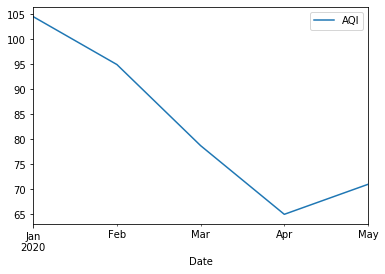

>-----------CITY :Hyderabad------ANALYSIS ON :AQI
          Date    City         AQI
71  2020-01-01  Jaipur  112.451613
154 2020-02-01  Jaipur  125.241379
238 2020-03-01  Jaipur  100.935484
324 2020-04-01  Jaipur   86.200000
410 2020-05-01  Jaipur  163.000000


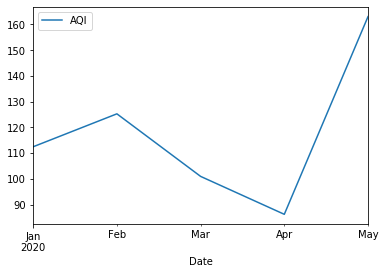

>-----------CITY :Jaipur------ANALYSIS ON :AQI
          Date        City         AQI
72  2020-01-01  Jorapokhar  162.935484
155 2020-02-01  Jorapokhar  166.605440
239 2020-03-01  Jorapokhar  162.009632
325 2020-04-01  Jorapokhar  121.400000
411 2020-05-01  Jorapokhar  110.000000


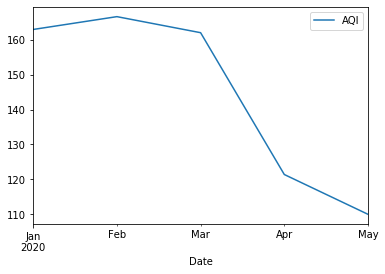

>-----------CITY :Jorapokhar------ANALYSIS ON :AQI
          Date   City         AQI
73  2020-01-01  Kochi  151.770707
156 2020-02-01  Kochi  121.068966
240 2020-03-01  Kochi  128.635712
326 2020-04-01  Kochi   77.033333
412 2020-05-01  Kochi   56.000000


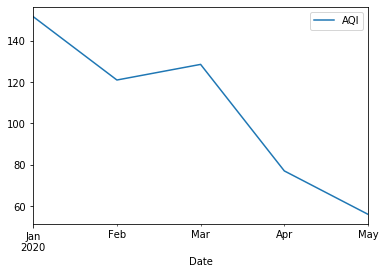

>-----------CITY :Kochi------ANALYSIS ON :AQI
          Date     City         AQI
74  2020-01-01  Kolkata  216.935484
157 2020-02-01  Kolkata  197.724138
241 2020-03-01  Kolkata  122.838710
327 2020-04-01  Kolkata   70.366667
413 2020-05-01  Kolkata   69.000000


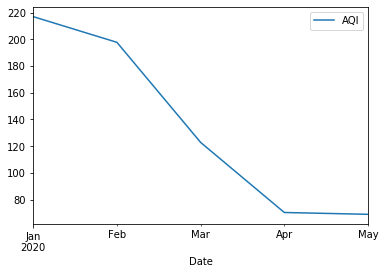

>-----------CITY :Kolkata------ANALYSIS ON :AQI
          Date     City         AQI
75  2020-01-01  Lucknow  272.645161
158 2020-02-01  Lucknow  216.655172
242 2020-03-01  Lucknow  134.000000
328 2020-04-01  Lucknow  106.733333
414 2020-05-01  Lucknow   82.000000


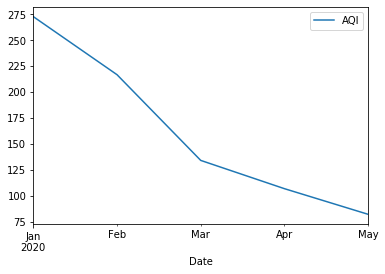

>-----------CITY :Lucknow------ANALYSIS ON :AQI
          Date    City         AQI
76  2020-01-01  Mumbai  168.645161
159 2020-02-01  Mumbai  159.206897
243 2020-03-01  Mumbai  104.645161
329 2020-04-01  Mumbai   74.333333
415 2020-05-01  Mumbai   64.000000


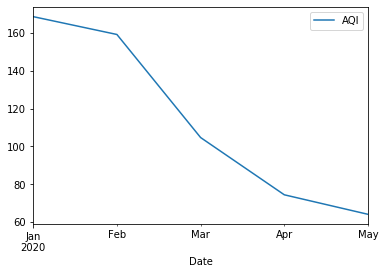

>-----------CITY :Mumbai------ANALYSIS ON :AQI
          Date   City         AQI
77  2020-01-01  Patna  262.838710
160 2020-02-01  Patna  201.206897
244 2020-03-01  Patna  158.419355
330 2020-04-01  Patna  131.166667
416 2020-05-01  Patna  118.000000


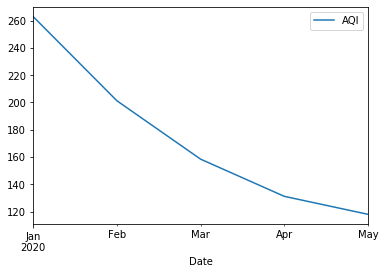

>-----------CITY :Patna------ANALYSIS ON :AQI
          Date      City        AQI
78  2020-01-01  Shillong  66.690768
161 2020-02-01  Shillong  90.376694
245 2020-03-01  Shillong  67.870968
331 2020-04-01  Shillong  64.389195
417 2020-05-01  Shillong  62.641379


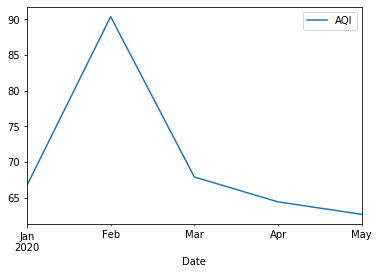

>-----------CITY :Shillong------ANALYSIS ON :AQI
          Date     City         AQI
79  2020-01-01  Talcher  293.475918
162 2020-02-01  Talcher  191.840577
246 2020-03-01  Talcher  131.052808
332 2020-04-01  Talcher  133.679224
418 2020-05-01  Talcher  101.000000


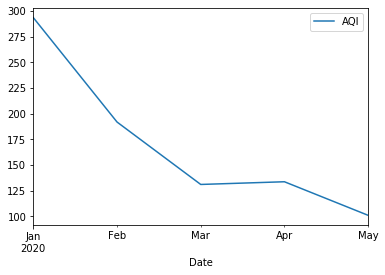

>-----------CITY :Talcher------ANALYSIS ON :AQI
          Date                City        AQI
80  2020-01-01  Thiruvananthapuram  78.258065
163 2020-02-01  Thiruvananthapuram  88.620690
247 2020-03-01  Thiruvananthapuram  74.741935
333 2020-04-01  Thiruvananthapuram  57.066667
419 2020-05-01  Thiruvananthapuram  82.000000


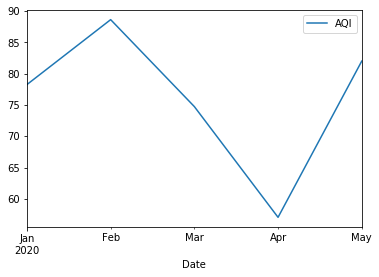

>-----------CITY :Thiruvananthapuram------ANALYSIS ON :AQI


In [15]:
#for 2020 analysis before and after lockdown grouped by City
for citynm, df_region4 in df31.groupby('City'):
    
    print(df_region4)
    df_region4 = df_region4.drop('City', 1)
    #df_region4 = df_region4[df_region4["Date"].isin(pd.date_range("2020-01-01", "2020-05-01"))]
    if(len(df_region4)>1):
        df_region4.plot(x ='Date', y=Pollutant_name1, kind = 'line')
        plt.show()
        if df_region4[Pollutant_name1].mean()==0:
            print('Anomalie detected or Fault Detected in recording '+Pollutant_name1+' in ' +citynm)
    else:
         print('Does not have adequate data to plot graph for City: ' +citynm+' on '+Pollutant_name1 )
    print(">-----------CITY :"+citynm+"------ANALYSIS ON :"+Pollutant_name1)

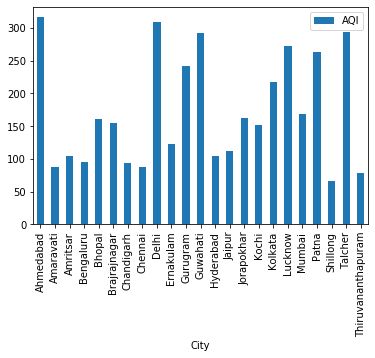

Top 3 Cities in AQI Factor ...
         Date       City         AQI
58 2020-01-01  Ahmedabad  316.521265
66 2020-01-01      Delhi  308.451613
79 2020-01-01    Talcher  293.475918
------------------------------------------
Least 3 Cities in AQI Factor ...
         Date                City        AQI
78 2020-01-01            Shillong  66.690768
80 2020-01-01  Thiruvananthapuram  78.258065
65 2020-01-01             Chennai  87.516129
------------------------------------------
Details of All Cities sorted 
         Date                City         AQI
58 2020-01-01           Ahmedabad  316.521265
66 2020-01-01               Delhi  308.451613
79 2020-01-01             Talcher  293.475918
69 2020-01-01            Guwahati  291.645161
75 2020-01-01             Lucknow  272.645161
77 2020-01-01               Patna  262.838710
68 2020-01-01            Gurugram  242.225806
74 2020-01-01             Kolkata  216.935484
76 2020-01-01              Mumbai  168.645161
72 2020-01-01          Jorapokha

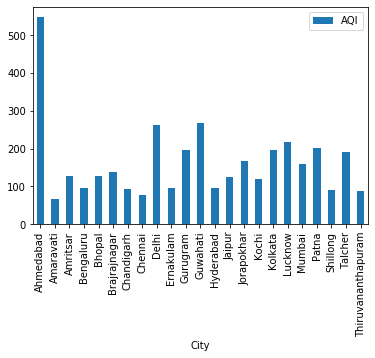

Top 3 Cities in AQI Factor ...
          Date       City         AQI
141 2020-02-01  Ahmedabad  547.689655
152 2020-02-01   Guwahati  266.620690
149 2020-02-01      Delhi  262.137931
------------------------------------------
Least 3 Cities in AQI Factor ...
          Date                City        AQI
142 2020-02-01           Amaravati  67.103448
148 2020-02-01             Chennai  78.137931
163 2020-02-01  Thiruvananthapuram  88.620690
------------------------------------------
Details of All Cities sorted 
          Date                City         AQI
141 2020-02-01           Ahmedabad  547.689655
152 2020-02-01            Guwahati  266.620690
149 2020-02-01               Delhi  262.137931
158 2020-02-01             Lucknow  216.655172
160 2020-02-01               Patna  201.206897
157 2020-02-01             Kolkata  197.724138
151 2020-02-01            Gurugram  197.137931
162 2020-02-01             Talcher  191.840577
155 2020-02-01          Jorapokhar  166.605440
159 2020-02-01

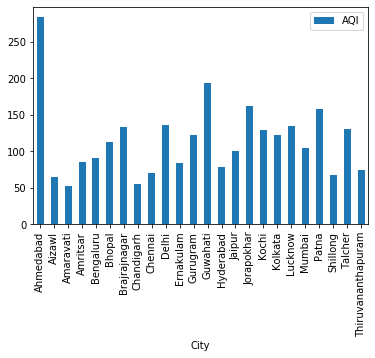

Top 3 Cities in AQI Factor ...
          Date        City         AQI
224 2020-03-01   Ahmedabad  283.606123
236 2020-03-01    Guwahati  193.806452
239 2020-03-01  Jorapokhar  162.009632
------------------------------------------
Least 3 Cities in AQI Factor ...
          Date        City        AQI
226 2020-03-01   Amaravati  52.548387
231 2020-03-01  Chandigarh  55.419355
225 2020-03-01      Aizawl  64.576097
------------------------------------------
Details of All Cities sorted 
          Date                City         AQI
224 2020-03-01           Ahmedabad  283.606123
236 2020-03-01            Guwahati  193.806452
239 2020-03-01          Jorapokhar  162.009632
244 2020-03-01               Patna  158.419355
233 2020-03-01               Delhi  135.838710
242 2020-03-01             Lucknow  134.000000
230 2020-03-01        Brajrajnagar  133.630824
246 2020-03-01             Talcher  131.052808
240 2020-03-01               Kochi  128.635712
241 2020-03-01             Kolkata  122.83

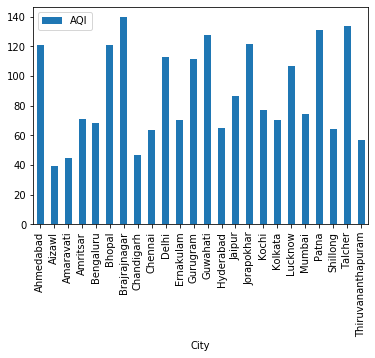

Top 3 Cities in AQI Factor ...
          Date          City         AQI
316 2020-04-01  Brajrajnagar  139.661279
332 2020-04-01       Talcher  133.679224
330 2020-04-01         Patna  131.166667
------------------------------------------
Least 3 Cities in AQI Factor ...
          Date        City        AQI
311 2020-04-01      Aizawl  39.233333
312 2020-04-01   Amaravati  44.400000
317 2020-04-01  Chandigarh  46.538796
------------------------------------------
Details of All Cities sorted 
          Date                City         AQI
316 2020-04-01        Brajrajnagar  139.661279
332 2020-04-01             Talcher  133.679224
330 2020-04-01               Patna  131.166667
322 2020-04-01            Guwahati  127.833333
325 2020-04-01          Jorapokhar  121.400000
315 2020-04-01              Bhopal  121.201075
310 2020-04-01           Ahmedabad  120.733333
319 2020-04-01               Delhi  113.000000
321 2020-04-01            Gurugram  111.166667
328 2020-04-01             Lucknow

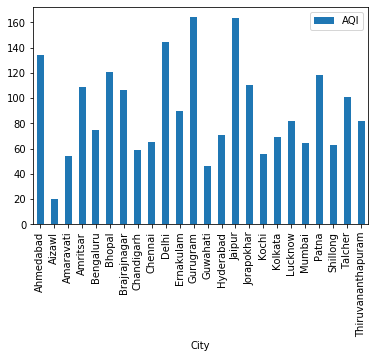

Top 3 Cities in AQI Factor ...
          Date      City    AQI
407 2020-05-01  Gurugram  164.0
410 2020-05-01    Jaipur  163.0
405 2020-05-01     Delhi  144.0
------------------------------------------
Least 3 Cities in AQI Factor ...
          Date       City   AQI
397 2020-05-01     Aizawl  20.0
408 2020-05-01   Guwahati  46.0
398 2020-05-01  Amaravati  54.0
------------------------------------------
Details of All Cities sorted 
          Date                City         AQI
407 2020-05-01            Gurugram  164.000000
410 2020-05-01              Jaipur  163.000000
405 2020-05-01               Delhi  144.000000
396 2020-05-01           Ahmedabad  134.000000
401 2020-05-01              Bhopal  121.000000
416 2020-05-01               Patna  118.000000
411 2020-05-01          Jorapokhar  110.000000
399 2020-05-01            Amritsar  109.000000
402 2020-05-01        Brajrajnagar  106.000000
418 2020-05-01             Talcher  101.000000
406 2020-05-01           Ernakulam   90.000000


In [19]:
#for 2020 analysis before and after lockdown grouped by date
for datte, df_region5 in df31.groupby('Date'):
    #df_region=df_region.reset_index(level=['Date', 'City'])
    df_region5.plot(x ='City', y=Pollutant_name1, kind = 'bar')
    plt.show()
    print('Top 3 Cities in '+ Pollutant_name1 +' Factor ...' )
    print(df_region5.nlargest(3, [Pollutant_name1]))
    print('------------------------------------------')
    print('Least 3 Cities in '+ Pollutant_name1 +' Factor ...' )
    print(df_region5.nsmallest(3, [Pollutant_name1])) 
    print('------------------------------------------')
    print('Details of All Cities sorted ')
    print(df_region5.sort_values(by=[Pollutant_name1], ascending=False))
    print(' ________________________________________________________')
    print('|YEAR :'+str(datte)+' Analysis for ' +Pollutant_name1+' Factor       |')
    print('|________________________________________________________|')